Dataset Preview:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2  

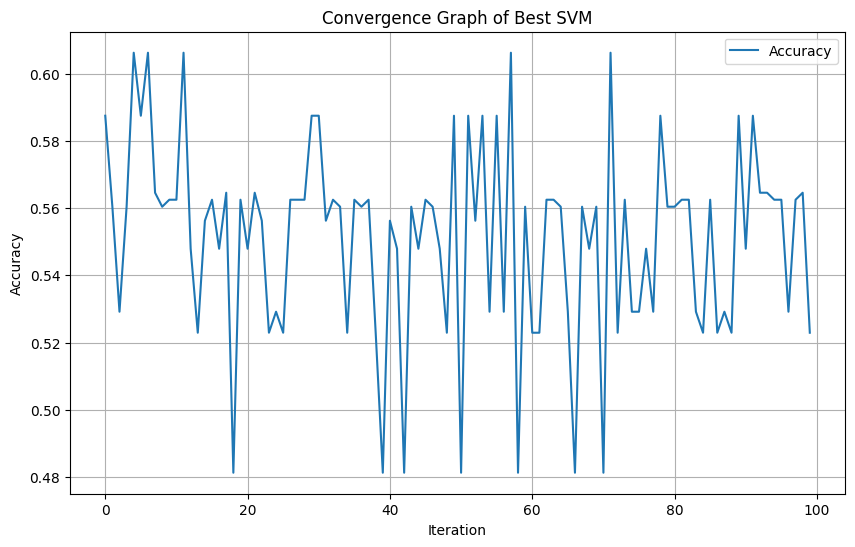


Results saved to 'svm_results.csv'.


In [12]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')  # Dataset uses ';' as the delimiter

# Display dataset information
print("Dataset Preview:")
print(data.head())
print("\nDataset Info:")
print(data.info())

# Step 2: Prepare Features and Target
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target (Quality score)

# Step 3: Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Split Dataset (70% Training, 30% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Optimize SVM for 100 Iterations
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
nu_values = [0.1, 0.5, 1]
epsilon_values = [0.001, 0.01, 0.1]

# Store results
results = []
best_accuracy = 0
best_params = {}

# Optimization loop
for iteration in range(100):
    kernel = np.random.choice(kernels)
    nu = np.random.choice(nu_values)
    epsilon = np.random.choice(epsilon_values)
    
    # Train the SVM model
    model = SVC(kernel=kernel, C=nu)  # 'C' is equivalent to the regularization parameter
    model.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'Kernel': kernel, 'C': nu, 'Epsilon': epsilon}
    
    # Record results
    results.append((iteration, accuracy))
    print(f"Iteration {iteration+1}: Accuracy={accuracy:.4f}, Params={best_params}")

# Final output for best parameters
print("\nBest Accuracy Achieved:", best_accuracy)
print("Best Parameters:", best_params)

# Step 6: Plot Convergence Graph
iterations = [r[0] for r in results]
accuracies = [r[1] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracies, label='Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Convergence Graph of Best SVM')
plt.legend()
plt.grid()
plt.show()

# Step 7: Save Results to CSV
results_df = pd.DataFrame(results, columns=['Iteration', 'Accuracy'])
results_df.to_csv('svm_results.csv', index=False)
print("\nResults saved to 'svm_results.csv'.")
